<a href="https://colab.research.google.com/github/GhazalehKeyvani/Data-Science-Exercises/blob/main/Timeseries_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

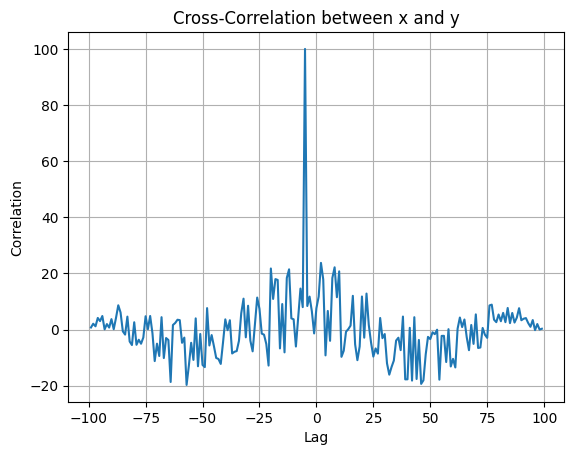

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.randn(100)
y = np.roll(x, 5) + np.random.randn(100) * 0.1  # y = x shifted by 5

corr = np.correlate(x - np.mean(x), y - np.mean(y), mode='full')
lags = np.arange(-len(x)+1, len(x))

plt.plot(lags, corr)
plt.title("Cross-Correlation between x and y")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()


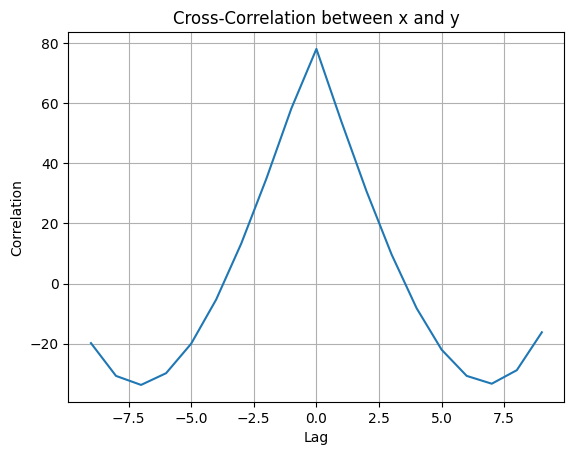

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,1,2,3,4,5,6,7,8])

# نرمال‌سازی
x = x - np.mean(x)
y = y - np.mean(y)

# محاسبه cross-correlation
corr = np.correlate(x, y, mode='full')
lags = np.arange(-len(x)+1, len(x))

# رسم نمودار
plt.plot(lags, corr)
plt.title("Cross-Correlation between x and y")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(0)
n = 100
x = pd.Series(np.random.randn(n))
# y ≈ x با تاخیر 5 به علاوه کمی نویز
y = x.shift(5).fillna(0) + np.random.randn(n)*0.1

# 1) ساخت ویژگی‌های لگ برای x
df = pd.DataFrame({'x': x, 'y': y})
for k in [1, 2, 3, 5, 7, 24]:
    df[f'x_lag_{k}'] = df['x'].shift(k)

# 2) ساخت ویژگی‌های مووینگ (میانگین و انحراف معیار)
for w in [3, 5, 7]:
    df[f'x_ma_{w}']  = df['x'].rolling(w).mean()
    df[f'x_std_{w}'] = df['x'].rolling(w).std()

# 3) بررسی cross-correlation به صورت سرانگشتی
def xcorr(a, b, max_lag=10):
    out = []
    a = (a - a.mean())/a.std()
    b = (b - b.mean())/b.std()
    for k in range(-max_lag, max_lag+1):
        if k < 0:
            out.append((k, a.shift(-k).corr(b)))
        else:
            out.append((k, a.corr(b.shift(k))))
    return pd.DataFrame(out, columns=['lag','corr']).set_index('lag')

xc = xcorr(x, y, max_lag=10)
print(xc.loc[-10:10].sort_values('corr', ascending=False).head(5))


         corr
lag          
-5   0.995435
 8   0.231797
 10  0.208113
 2   0.195400
 7   0.183929


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array([[1], [2], [3], [4]])
y = np.array([50, 55, 65, 70])

model = LinearRegression().fit(x, y)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Intercept: 42.5
Slope: 7.0


In [ ]:
X = np.array([[1,2], [2,3], [3,4], [4,5]])
y = np.array([52, 58, 67, 75])

model = LinearRegression().fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 39.60000000000001
Coefficients: [3.9 3.9]


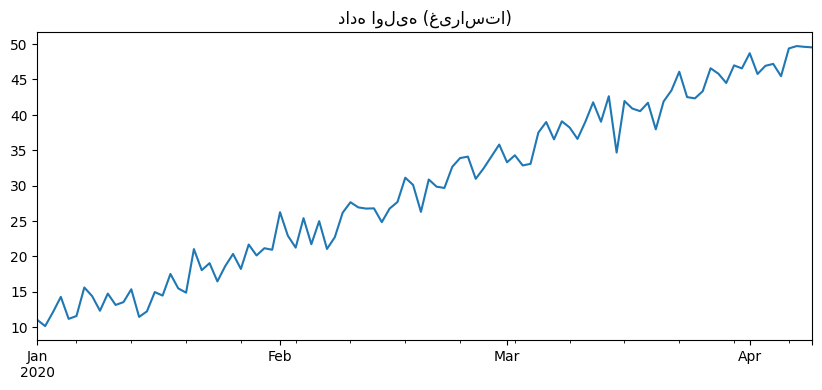

ADF Statistic: 0.09876067397506966
p-value: 0.9659763776183391
❌ داده غیراستا است.


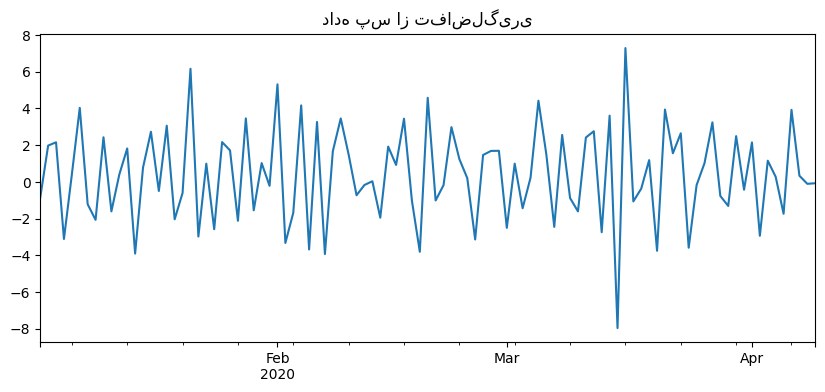

ADF Statistic (تفاضل): -5.194567863079865
p-value (تفاضل): 9.019393985742622e-06
✅ داده پس از تفاضل‌گیری ایستا شده.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# تولید داده غیراستا با روند افزایشی
np.random.seed(42)
n = 100
trend = np.linspace(10, 50, n)
noise = np.random.normal(0, 2, n)
non_stationary_data = trend + noise

# تبدیل به DataFrame
df = pd.DataFrame({'y': non_stationary_data})
df.index = pd.date_range(start='2020-01-01', periods=n, freq='D')

# رسم نمودار اولیه
df['y'].plot(title='داده اولیه (غیراستا)', figsize=(10, 4))
plt.show()

# تست ADF
result = adfuller(df['y'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("✅ داده ایستا است.")
else:
    print("❌ داده غیراستا است.")

# ایستا کردن با تفاضل‌گیری
df['y_diff'] = df['y'] - df['y'].shift(1)
df['y_diff'].dropna().plot(title='داده پس از تفاضل‌گیری', figsize=(10, 4))
plt.show()

# تست ADF دوباره
result_diff = adfuller(df['y_diff'].dropna())
print("ADF Statistic (تفاضل):", result_diff[0])
print("p-value (تفاضل):", result_diff[1])
if result_diff[1] < 0.05:
    print("✅ داده پس از تفاضل‌گیری ایستا شده.")
else:
    print("❌ هنوز غیراستا است.")


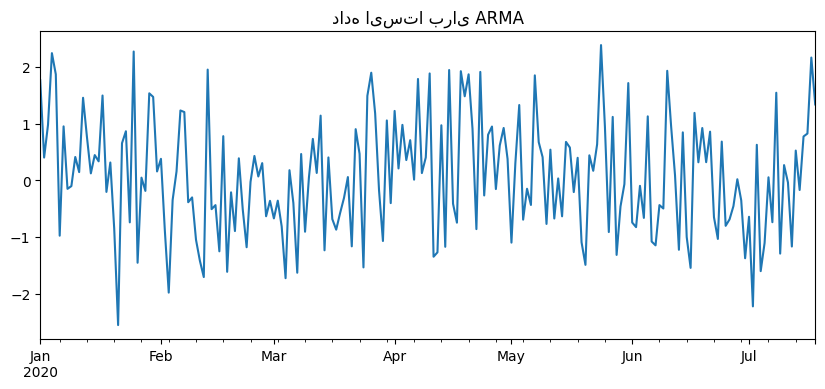

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -282.995
Date:                Mon, 01 Sep 2025   AIC                            577.989
Time:                        08:04:48   BIC                            597.779
Sample:                    01-01-2020   HQIC                           585.998
                         - 07-18-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0734      0.078      0.940      0.347      -0.080       0.226
ar.L1          0.8129      0.046     17.800      0.000       0.723       0.902
ar.L2         -0.8836      0.045    -19.488      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# تولید داده ایستا
np.random.seed(0)
n = 200
noise = np.random.normal(0, 1, n)
df_arma = pd.DataFrame({'y': noise})
df_arma.index = pd.date_range(start='2020-01-01', periods=n)

# رسم نمودار
df_arma['y'].plot(title='داده ایستا برای ARMA', figsize=(10, 4))
plt.show()

# مدل ARMA(p=2, q=2)
model_arma = ARIMA(df_arma['y'], order=(2, 0, 2))
result_arma = model_arma.fit()
print(result_arma.summary())


In [ ]:
trend = np.linspace(10, 50, 200)
noise = np.random.normal(0, 2, 200)
data = trend + noise
# داده با روند
model = ARIMA(data, order=(2, 1, 2)).fit()


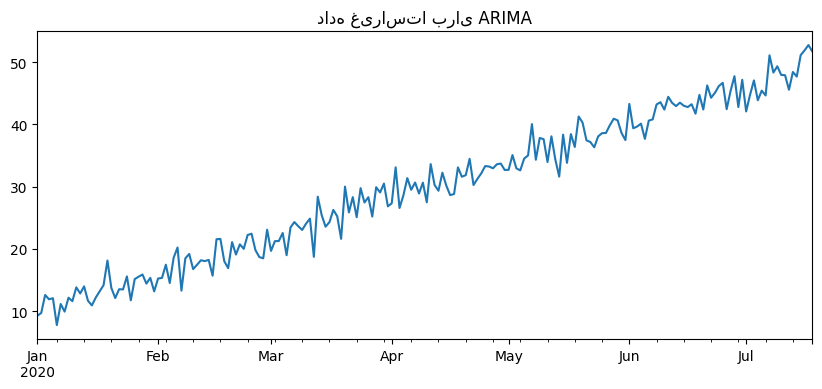

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -435.446
Date:                Mon, 01 Sep 2025   AIC                            880.892
Time:                        08:04:50   BIC                            897.358
Sample:                    01-01-2020   HQIC                           887.556
                         - 07-18-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1043      0.291     -3.798      0.000      -1.674      -0.534
ar.L2         -0.2294      0.103     -2.225      0.026      -0.432      -0.027
ma.L1          0.2821      0.301      0.939      0.3

In [ ]:
# تولید داده با روند افزایشی
trend = np.linspace(10, 50, n)
noise = np.random.normal(0, 2, n)
non_stationary = trend + noise
df_arima = pd.DataFrame({'y': non_stationary})
df_arima.index = pd.date_range(start='2020-01-01', periods=n)

# رسم نمودار
df_arima['y'].plot(title='داده غیراستا برای ARIMA', figsize=(10, 4))
plt.show()

# مدل ARIMA(p=2, d=1, q=2)
model_arima = ARIMA(df_arima['y'], order=(2, 1, 2))
result_arima = model_arima.fit()
print(result_arima.summary())


In [ ]:
trend = np.linspace(10, 50, 200)
noise = np.random.normal(0, 2, 200)
data = trend + noise
# داده با روند
model = ARIMA(data, order=(2, 1, 2)).fit()


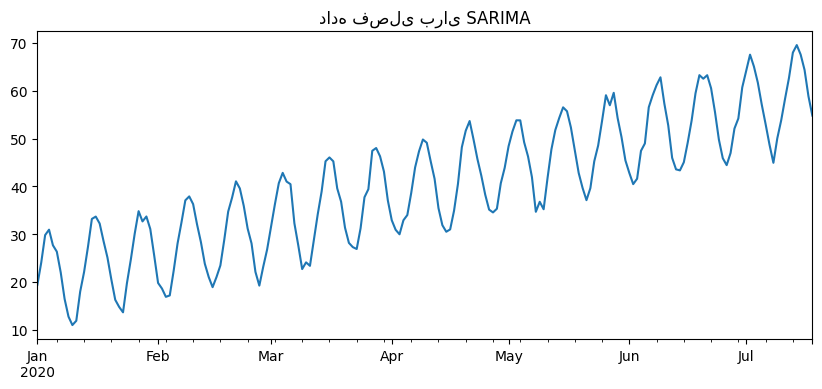

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  200
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -290.970
Date:                              Mon, 01 Sep 2025   AIC                            595.939
Time:                                      08:05:13   BIC                            618.557
Sample:                                  01-01-2020   HQIC                           605.104
                                       - 07-18-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9727      0.091    -10.632      0.000      -1.152      -0.793
ar.L2         -0.04

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# تولید داده فصلی با روند
seasonal = 10 * np.sin(np.arange(n) * 2 * np.pi / 12)
trend = np.linspace(20, 60, n)
noise = np.random.normal(0, 1, n)
seasonal_data = trend + seasonal + noise
df_sarima = pd.DataFrame({'y': seasonal_data})
df_sarima.index = pd.date_range(start='2020-01-01', periods=n)

# رسم نمودار
df_sarima['y'].plot(title='داده فصلی برای SARIMA', figsize=(10, 4))
plt.show()

# مدل SARIMA(p=2, d=1, q=2) × (P=1, D=1, Q=1, s=12)
model_sarima = SARIMAX(df_sarima['y'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
result_sarima = model_sarima.fit()
print(result_sarima.summary())


In [ ]:
seasonal = 10 * np.sin(np.arange(200) * 2 * np.pi / 12)
trend = np.linspace(20, 60, 200)
noise = np.random.normal(0, 1, 200)
data = trend + seasonal + noise
# داده با روند و فصل‌پذیری
model = SARIMAX(data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


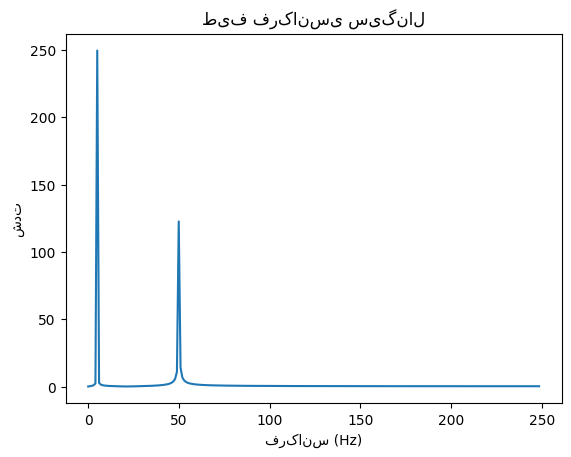

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# سیگنال ترکیبی: موج اصلی + نویز
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # موج 5Hz + نویز 50Hz

# تبدیل فوریه
fft_vals = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(t), d=t[1]-t[0])

plt.plot(freqs[:250], np.abs(fft_vals[:250]))
plt.title("طیف فرکانسی سیگنال")
plt.xlabel("فرکانس (Hz)")
plt.ylabel("شدت")
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd

# داده ساختگی با روند و فصل‌پذیری
np.random.seed(0)
n = 100
trend = np.linspace(10, 50, n)
seasonal = 5 * np.sin(np.arange(n) * 2 * np.pi / 12)
noise = np.random.normal(0, 1, n)
data = trend + seasonal + noise

model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()
print(result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -134.870
Date:                            Mon, 01 Sep 2025   AIC                            279.739
Time:                                    08:38:17   BIC                            292.069
Sample:                                         0   HQIC                           284.704
                                            - 100                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0495      0.132     -0.376      0.707      -0.308       0.209
ma.L1         -0.8976      0.074   

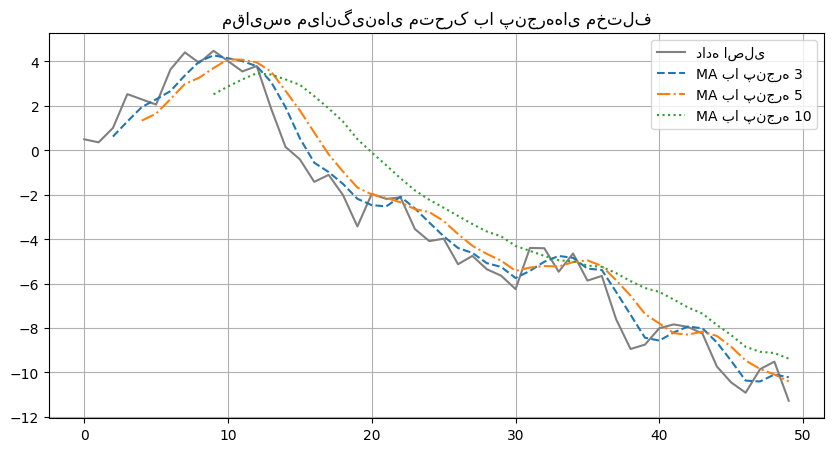

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# تولید داده تصادفی
np.random.seed(42)
n = 50
data = np.random.randn(n).cumsum()  # داده با روند

# تبدیل به سری زمانی
ts = pd.Series(data)

# محاسبه میانگین متحرک با پنجره‌های مختلف
ma_3 = ts.rolling(window=3).mean()
ma_5 = ts.rolling(window=5).mean()
ma_10 = ts.rolling(window=10).mean()

# رسم نمودار
plt.figure(figsize=(10, 5))
plt.plot(ts, label='داده اصلی', color='gray')
plt.plot(ma_3, label='MA با پنجره 3', linestyle='--')
plt.plot(ma_5, label='MA با پنجره 5', linestyle='-.')
plt.plot(ma_10, label='MA با پنجره 10', linestyle=':')
plt.title('مقایسه میانگین‌های متحرک با پنجره‌های مختلف')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                  200
Model:                    local level   Log Likelihood                -311.607
Date:                Mon, 01 Sep 2025   AIC                            627.214
Time:                        09:36:10   BIC                            633.800
Sample:                    01-01-2020   HQIC                           629.879
                         - 07-18-2020                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     1.0181      0.119      8.546      0.000       0.785       1.252
sigma2.level         0.0755      0.031      2.404      0.016       0.014       0.137
Ljung-Box (L1) (Q):         

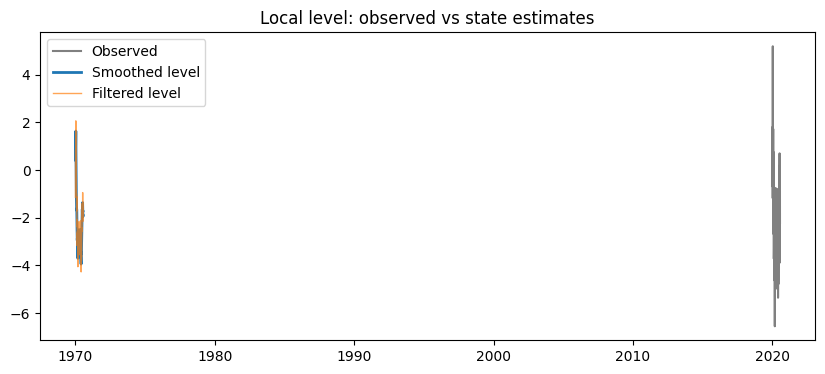

Estimated measurement variance (H): 1.0181359157241578


AttributeError: 'UnobservedComponentsResults' object has no attribute 'smoothing_results'

In [ ]:
# Example 1: Local Level State Space (UnobservedComponents)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

np.random.seed(42)
n = 200
# Generate local level data
sigma_eta = 0.3  # state noise (drift of level)
sigma_eps = 1.0  # measurement noise
mu = np.zeros(n)
mu[0] = 0.0
for t in range(1, n):
    mu[t] = mu[t-1] + np.random.normal(0, sigma_eta)
y = mu + np.random.normal(0, sigma_eps, size=n)

ts = pd.Series(y, index=pd.date_range('2020-01-01', periods=n, freq='D'))

# Fit local level model
mod = UnobservedComponents(ts, level='local level')
res = mod.fit(disp=False)
print(res.summary())

# Plot observed vs filtered/smoothed level
plt.figure(figsize=(10,4))
plt.plot(ts, color='gray', label='Observed')
plt.plot(res.level.smoothed, label='Smoothed level', lw=2)
plt.plot(res.level.filtered, label='Filtered level', lw=1, alpha=0.7)
plt.legend(); plt.title('Local level: observed vs state estimates'); plt.show()

# Variance decomposition (signal-to-noise)
print("Estimated measurement variance (H):", float(res.filter_results.obs_cov[0,0,0]))
print("Estimated state variance (Q):", float(res.smoothing_results.state_cov[0,0,0]))


/tmp/ipython-input-3623737953.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range('2016-01-01', periods=n, freq='M')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


                            Unobserved Components Results                            
Dep. Variable:                             y   No. Observations:                  240
Model:                    local linear trend   Log Likelihood                -391.719
                   + stochastic seasonal(12)   AIC                            791.438
Date:                       Mon, 01 Sep 2025   BIC                            805.138
Time:                               09:35:27   HQIC                           796.966
Sample:                           01-31-2016                                         
                                - 12-31-2035                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     1.0971      0.148      7.399      0

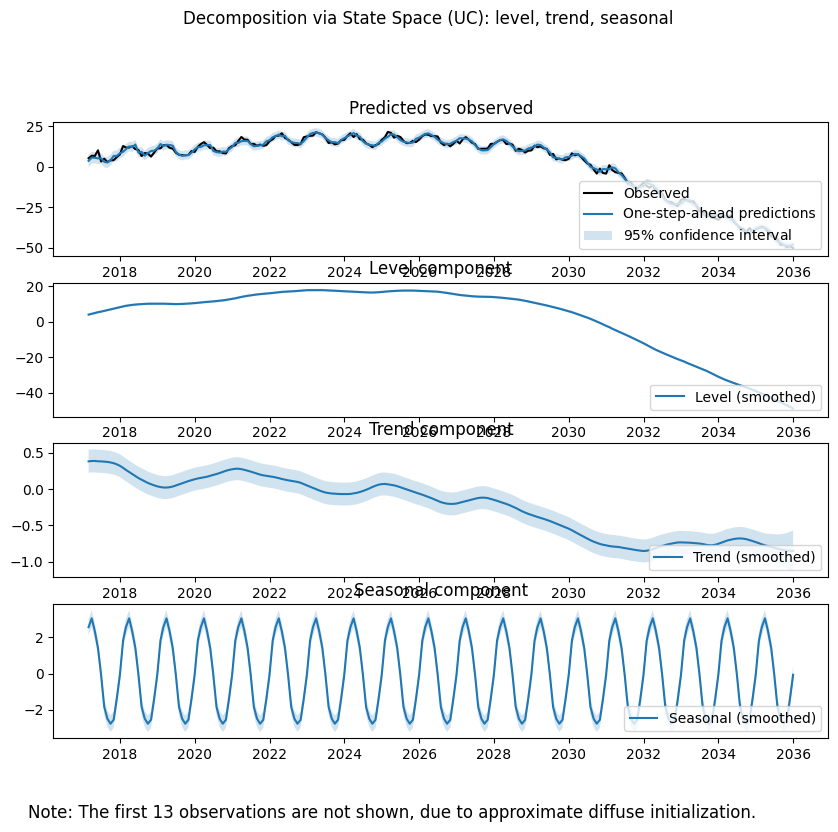

In [ ]:
# Example 2: Local Linear Trend + Seasonal(12)
from statsmodels.tsa.statespace.structural import UnobservedComponents

np.random.seed(0)
n = 240
idx = pd.date_range('2016-01-01', periods=n, freq='M')

# Simulate components
sigma_mu, sigma_beta, sigma_seas, sigma_eps = 0.2, 0.05, 0.3, 1.0
mu = np.zeros(n); beta = np.zeros(n)
for t in range(1, n):
    beta[t] = beta[t-1] + np.random.normal(0, sigma_beta)
    mu[t] = mu[t-1] + beta[t-1] + np.random.normal(0, sigma_mu)
seasonal = 2.5*np.sin(2*np.pi*np.arange(n)/12) + 1.5*np.cos(2*np.pi*np.arange(n)/12) \
           + np.random.normal(0, sigma_seas, n)
y = mu + seasonal + np.random.normal(0, sigma_eps, n)
ts = pd.Series(y, index=idx)

# Fit UC model with local linear trend and seasonal 12
mod = UnobservedComponents(ts, level='local linear trend', seasonal=12)
res = mod.fit(disp=False)
print(res.summary())

# Plot components
res.plot_components(legend_loc='lower right', figsize=(10,8));
plt.suptitle('Decomposition via State Space (UC): level, trend, seasonal', y=1.02)
plt.show()


/tmp/ipython-input-3029447976.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range('2018-01-01', periods=n, freq='M')


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  180
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -253.879
Date:                            Mon, 01 Sep 2025   AIC                            519.758
Time:                                    09:32:36   BIC                            538.465
Sample:                                01-31-2018   HQIC                           527.351
                                     - 12-31-2032                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exog           1.1355      0.074     15.342      0.000       0.990       1.281
ar.L1          0.0400      0.083   

/tmp/ipython-input-3029447976.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Xf = pd.DataFrame({'exog': np.random.randn(h)}, index=pd.date_range(idx[-1]+pd.offsets.MonthEnd(), periods=h, freq='M'))


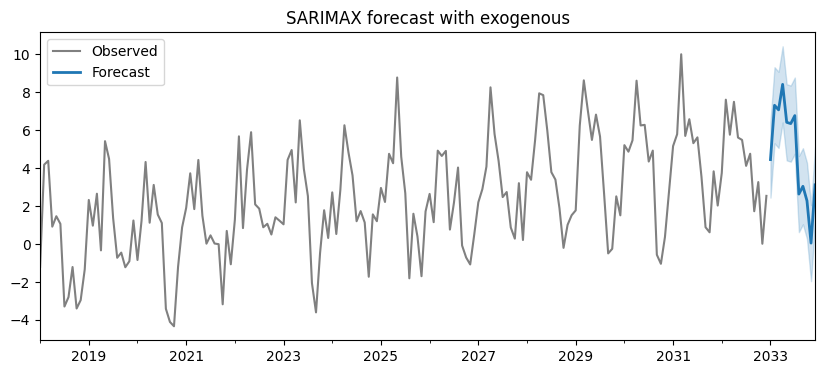

Estimated exog beta: 1.1355335880672308


In [ ]:
# Example 3: SARIMAX with exogenous regressor
from statsmodels.tsa.statespace.sarimax import SARIMAX

np.random.seed(123)
n = 180
idx = pd.date_range('2018-01-01', periods=n, freq='M')
# Exogenous feature (e.g., promotion index or temperature)
x = np.random.randn(n)
# True effect
beta_true = 1.2

# Simulate seasonal ARIMA(1,1,1)×(1,1,1,12) with exog effect
trend = np.linspace(0, 5, n)
seasonal = 3*np.sin(2*np.pi*np.arange(n)/12)
noise = np.random.normal(0, 1.0, n)
y = trend + seasonal + beta_true*x + noise

ts = pd.Series(y, index=idx)
X = pd.DataFrame({'exog': x}, index=idx)

# Fit SARIMAX
mod = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12), exog=X)
res = mod.fit(disp=False)
print(res.summary())

# Forecast with future exog
h = 12
Xf = pd.DataFrame({'exog': np.random.randn(h)}, index=pd.date_range(idx[-1]+pd.offsets.MonthEnd(), periods=h, freq='M'))
fc = res.get_forecast(steps=h, exog=Xf)
pred = fc.predicted_mean
ci = fc.conf_int()

ax = ts.plot(label='Observed', figsize=(10,4), color='gray')
pred.plot(ax=ax, label='Forecast', lw=2)
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='C0', alpha=0.2)
plt.legend(); plt.title('SARIMAX forecast with exogenous'); plt.show()

print("Estimated exog beta:", res.params.get('exog'))


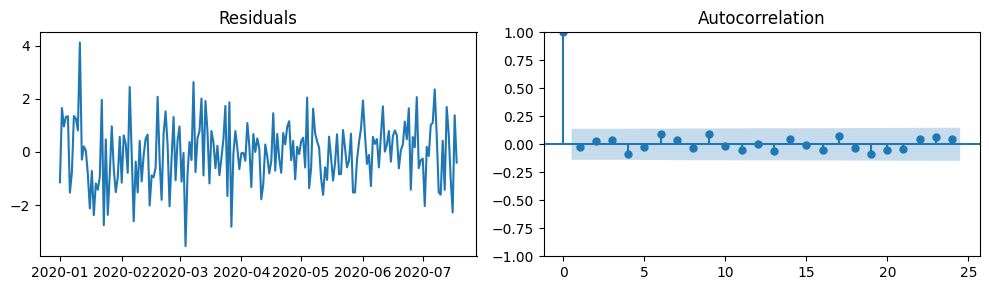

Ljung-Box p-values: {12: 0.856179151614392, 24: 0.9267827301065948}
Normality (Anderson-Darling) p-value: 0.469091552713008
Heteroskedasticity (ARCH) p-value: 0.25226037666132256


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch, normal_ad

resid = res.resid  # from any fitted model above (e.g., UC or SARIMAX)

fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(resid); ax[0].set_title('Residuals')
plot_acf(resid.dropna(), ax=ax[1], lags=24)
plt.tight_layout(); plt.show()

print("Ljung-Box p-values:", acorr_ljungbox(resid.dropna(), lags=[12,24]).iloc[:,-1].to_dict())
print("Normality (Anderson-Darling) p-value:", normal_ad(resid.dropna())[1])
print("Heteroskedasticity (ARCH) p-value:", het_arch(resid.dropna(), nlags=12)[1])


/tmp/ipython-input-3551079137.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range('2014-01-01', periods=n, freq='M')


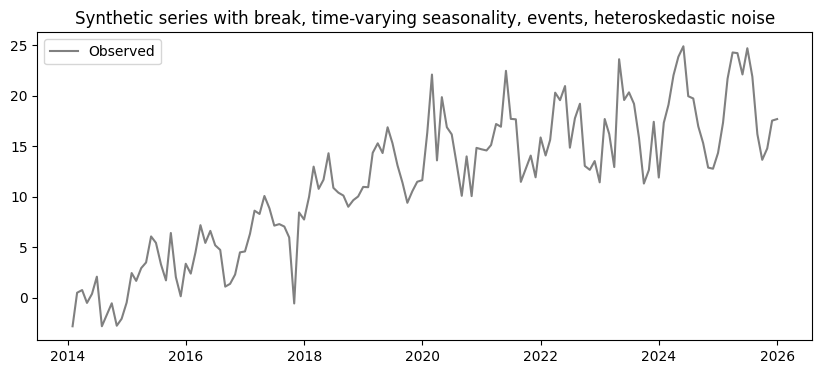

In [ ]:
# !pip install statsmodels pandas numpy matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch, normal_ad
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(123)

# زمان ماهانه ~ 12 سال
n = 144
idx = pd.date_range('2014-01-01', periods=n, freq='M')
t = np.arange(n)

# روند با شکست ساختاری
trend = 0.2*t
trend[t >= 72] = trend[71] + 0.05*(t[t >= 72]-71)  # تغییر شیب بعد از ماه 72

# فصل‌پذیری با دامنه متغیر
amp = 2 + 0.02*t  # دامنه در حال رشد
seasonal = amp * np.sin(2*np.pi*t/12)

# سیگنال برون‌زا با اثر واقعی
x = (t - t.mean())/t.std()
beta_true = 1.0

# نویز ناهمسان‌واریانس
eps = np.r_[np.random.normal(0, 1.0, 72),
            np.random.normal(0, 1.8, n-72)]

# رویداد/پرت‌ها
events = np.zeros(n)
events[[20, 45, 73, 110]] = [5, -6, 8, -7]

y = trend + seasonal + beta_true*x + events + eps

ts = pd.Series(y, index=idx)
X = pd.DataFrame({'x': x, 'event': (events != 0).astype(int)}, index=idx)

# تقسیم آموزش/آزمون
split = -24
y_train, y_test = ts.iloc[:split], ts.iloc[split:]
X_train, X_test = X.iloc[:split], X.iloc[split:]

fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.plot(ts, color='gray', label='Observed')
ax.set_title('Synthetic series with break, time-varying seasonality, events, heteroskedastic noise')
ax.legend(); plt.show()


In [ ]:
# UC ساده و غلط‌مشخصه: سطح + روند خطی محلی + فصل‌پذیری ثابت 12، بدون exog، بدون AR خطا
mod_bad = UnobservedComponents(
    y_train,
    level='local linear trend',
    seasonal=12,              # پیش‌فرض (deterministic) -> دامنه ثابت
    stochastic_seasonal=False # اصرار بر فصل‌پذیری قطعی
)
res_bad = mod_bad.fit(disp=False)
print(res_bad.summary())

# تشخیص: باقی‌مانده‌ها
resid_bad = res_bad.resid.dropna()
lb = acorr_ljungbox(resid_bad, lags=[12,24], return_df=True).iloc[:, -1].to_dict()
ad_p = normal_ad(resid_bad)[1]
arch_p = het_arch(resid_bad, nlags=12)[1]

print('Ljung-Box p-values:', lb)
print('Normality (AD) p-value:', ad_p)
print('ARCH p-value:', arch_p)

# پیش‌بینی روی دوره آزمون
fc_bad = res_bad.get_forecast(steps=len(y_test))
pred_bad = fc_bad.predicted_mean
ci_bad = fc_bad.conf_int()

# خطاها
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (np.maximum(1e-8, np.abs(y_true))))) * 100

rmse_bad = mean_squared_error(y_test, pred_bad, squared=False)
mae_bad = mean_absolute_error(y_test, pred_bad)
mape_bad = mape(y_test, pred_bad)

print(f'Bad UC -> RMSE: {rmse_bad:.2f}, MAE: {mae_bad:.2f}, MAPE: {mape_bad:.2f}%')

# نمودار مقایسه پیش‌بینی
ax = ts.plot(color='gray', label='Observed', figsize=(10,4))
pred_bad.index = y_test.index
pred_bad.plot(ax=ax, label='Bad UC forecast', color='C1')
ax.fill_between(ci_bad.index, ci_bad.iloc[:,0], ci_bad.iloc[:,1], color='C1', alpha=0.15)
ax.axvline(y_test.index[0], color='k', ls='--', alpha=0.6)
ax.legend(); ax.set_title('Mis-specified UC forecast'); plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                  120
Model:             local linear trend   Log Likelihood                -247.832
                       + seasonal(12)   AIC                            501.664
Date:                Mon, 01 Sep 2025   BIC                            509.683
Time:                        09:55:43   HQIC                           504.915
Sample:                    01-31-2014                                         
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     4.0675      0.598      6.801      0.000       2.895       5.240
sigma2.level      1.171e-08      0

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
# برای امنیت لگ، شیفت می‌دهیم تا مثبت شود
shift = max(0.0, 1.0 - ts.min())
y_train_log = np.log(y_train + shift)
y_test_log  = np.log(y_test  + shift)

# مدل UC بهبود یافته
mod_good = UnobservedComponents(
    y_train_log,
    level='local linear trend',
    seasonal=12,
    stochastic_seasonal=True,  # اجازه تغییر دامنه و شکل فصل‌پذیری
    autoregressive=1,          # خطای AR(1) برای همبستگی باقیمانده
    exog=X_train[['x','event']]# اثر برون‌زا و رویداد
)
res_good = mod_good.fit(disp=False)
print(res_good.summary())

# تشخیص
resid_good = res_good.resid.dropna()
lb_g = acorr_ljungbox(resid_good, lags=[12,24], return_df=True).iloc[:, -1].to_dict()
ad_p_g = normal_ad(resid_good)[1]
arch_p_g = het_arch(resid_good, nlags=12)[1]
print('Ljung-Box p-values (good):', lb_g)
print('Normality (AD) p-value (good):', ad_p_g)
print('ARCH p-value (good):', arch_p_g)

# پیش‌بینی و برگرداندن از لگ
fc_good = res_good.get_forecast(steps=len(y_test), exog=X_test[['x','event']])
pred_good_log = fc_good.predicted_mean
ci_good_log = fc_good.conf_int()

pred_good = np.exp(pred_good_log) - shift
ci_good = pd.DataFrame({
    'lower': np.exp(ci_good_log.iloc[:,0]) - shift,
    'upper': np.exp(ci_good_log.iloc[:,1]) - shift
}, index=pred_good_log.index)

rmse_good = mean_squared_error(y_test, pred_good, squared=False)
mae_good = mean_absolute_error(y_test, pred_good)
mape_good = mape(y_test, pred_good)

print(f'Good UC -> RMSE: {rmse_good:.2f}, MAE: {mae_good:.2f}, MAPE: {mape_good:.2f}%')

# نمودار مقایسه
ax = ts.plot(color='gray', label='Observed', figsize=(10,4))
pred_good.plot(ax=ax, label='Improved UC forecast', color='C2')
ax.fill_between(ci_good.index, ci_good['lower'], ci_good['upper'], color='C2', alpha=0.15)
ax.axvline(y_test.index[0], color='k', ls='--', alpha=0.6)
ax.legend(); ax.set_title('Improved UC with stochastic seasonality + exog + AR error'); plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


                            Unobserved Components Results                            
Dep. Variable:                             y   No. Observations:                  120
Model:                    local linear trend   Log Likelihood                 -29.278
                   + stochastic seasonal(12)   AIC                             74.556
                                     + AR(1)   BIC                             95.939
Date:                       Mon, 01 Sep 2025   HQIC                            83.225
Time:                               09:55:59                                         
Sample:                           01-31-2014                                         
                                - 12-31-2023                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


TypeError: got an unexpected keyword argument 'squared'

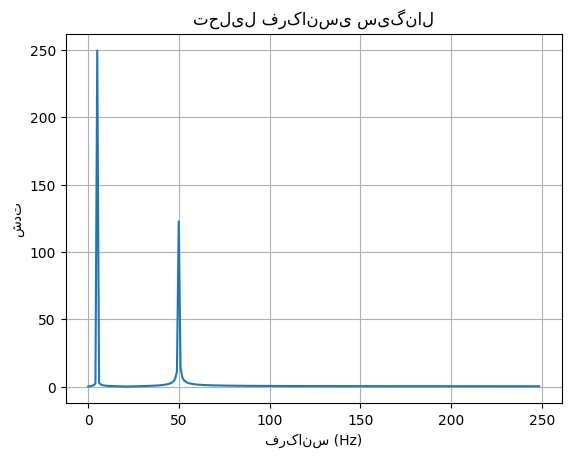

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# سیگنال ترکیبی: موج 5Hz + نویز 50Hz
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)

# تبدیل فوریه
fft_vals = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(t), d=t[1]-t[0])

# نمایش حوزه فرکانس
plt.plot(freqs[:250], np.abs(fft_vals[:250]))
plt.title("تحلیل فرکانسی سیگنال")
plt.xlabel("فرکانس (Hz)")
plt.ylabel("شدت")
plt.grid(True)
plt.show()


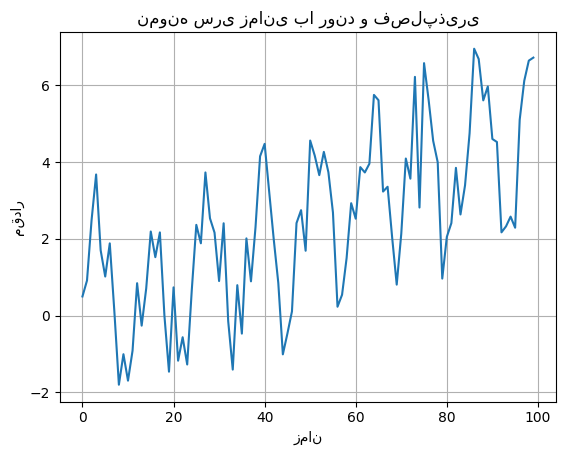

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
t = np.arange(100)
trend = 0.05 * t
seasonal = 2 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(0, 1, 100)
y = trend + seasonal + noise

plt.plot(t, y)
plt.title("نمونه سری زمانی با روند و فصل‌پذیری")
plt.xlabel("زمان")
plt.ylabel("مقدار")
plt.grid(True)
plt.show()


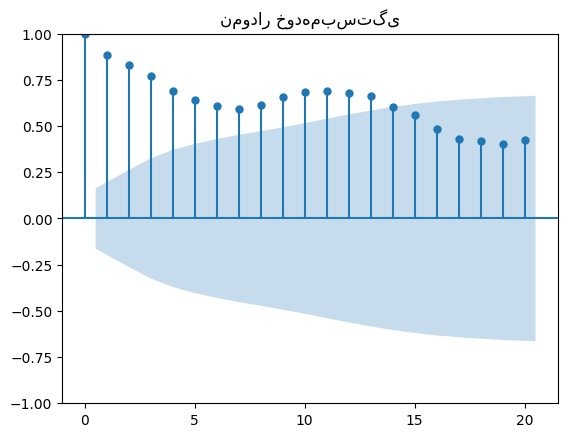

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags=20)
plt.title("نمودار خودهمبستگی")
plt.show()


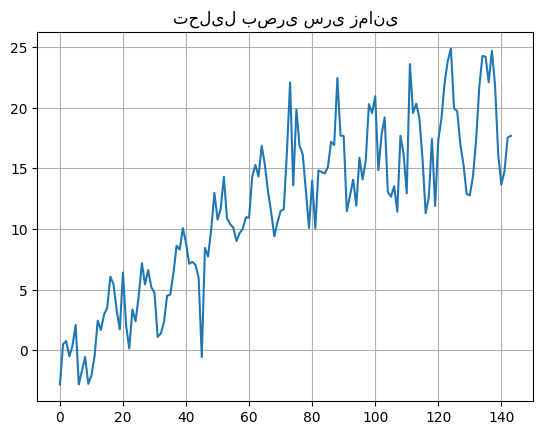

In [ ]:
import pandas as pd
pd.Series(y).plot(title="تحلیل بصری سری زمانی")
plt.grid(True)
plt.show()


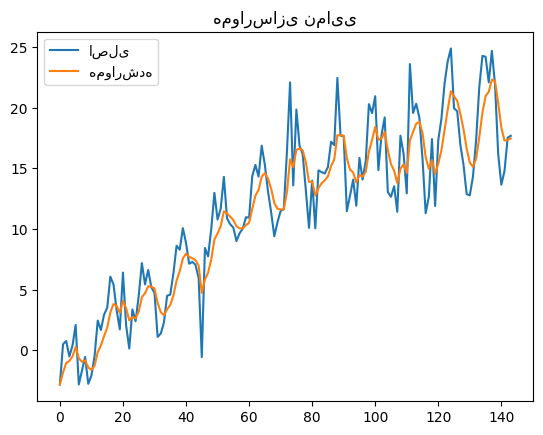

In [ ]:
alpha = 0.3
smoothed = [y[0]]
for i in range(1, len(y)):
    smoothed.append(alpha * y[i] + (1 - alpha) * smoothed[-1])

plt.plot(y, label="اصلی")
plt.plot(smoothed, label="هموارشده")
plt.legend()
plt.title("هموارسازی نمایی")
plt.show()


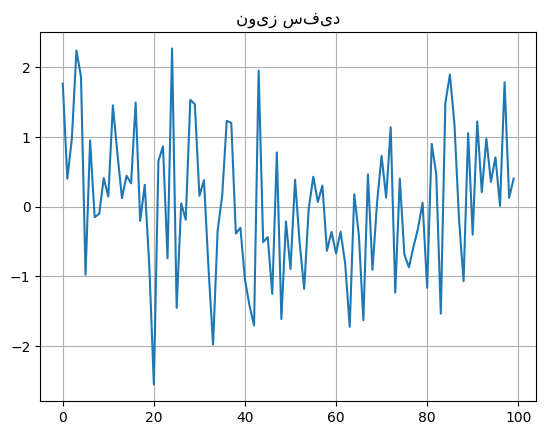

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
noise = np.random.normal(0, 1, 100)  # میانگین صفر، واریانس ۱

plt.plot(noise)
plt.title("نویز سفید")
plt.grid(True)
plt.show()


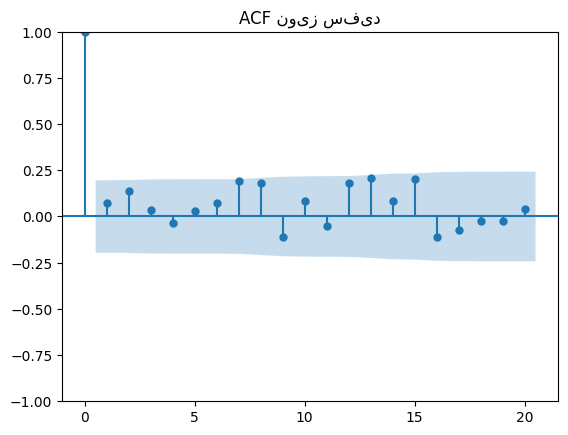

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(noise, lags=20)
plt.title("ACF نویز سفید")
plt.show()


/tmp/ipython-input-1128148532.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range('2010-01-01', periods=n, freq='M')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


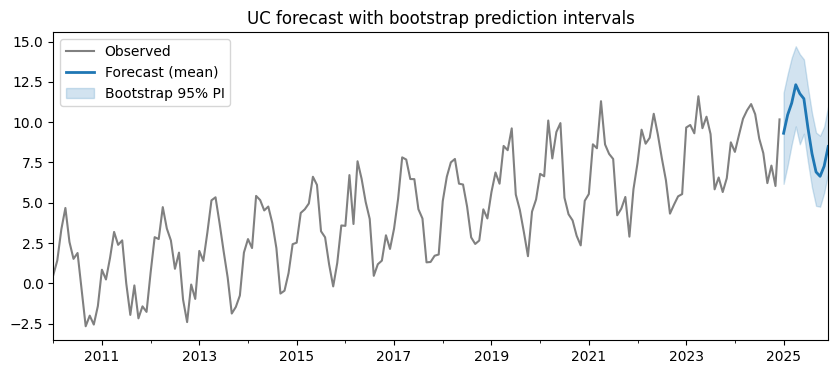

In [ ]:
# pip install statsmodels pandas numpy matplotlib
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

np.random.seed(42)

# 1) داده نمونه (ماهیانه) — اگر داده خودت را داری، این بخش را با سری خودت عوض کن
n = 180
idx = pd.date_range('2010-01-01', periods=n, freq='M')
t = np.arange(n)
y = 0.05*t + 3*np.sin(2*np.pi*t/12) + np.random.normal(0,1.0,n)
ts = pd.Series(y, index=idx)

# 2) برازش مدل UC: روند خطی محلی + فصل‌پذیری 12
mod = UnobservedComponents(ts, level='local linear trend', seasonal=12)
res = mod.fit(disp=False)

# 3) پیش‌بینی پایه برای h ماه آینده
h = 12
fc = res.get_forecast(steps=h)
pred_mean = fc.predicted_mean
pred_index = pred_mean.index

# 4) آماده‌سازی باقیمانده‌ها برای بوت‌استرپ بلوکی
resid = res.resid.dropna().values  # یک‌گام جلوتر
n_res = len(resid)

def draw_moving_block_series(eps, length, L):
    # eps: residuals array, length: needed length, L: block length
    out = []
    while len(out) < length:
        i = np.random.randint(0, n_res - L + 1)
        out.extend(eps[i:i+L])
    return np.array(out[:length])

# 5) ساخت مسیرهای بوت‌استرپیِ آینده
B = 2000
L = 12  # طول بلوک؛ برای ماهانه اغلب 12 شروع خوبی است
paths = np.empty((B, h))

for b in range(B):
    # نویز آینده با حفظ وابستگی کوتاه‌مدت
    eps_future = draw_moving_block_series(resid, h, L)
    # مسیر آینده = میانگین مدل + نویز بوت‌استرپی
    paths[b, :] = pred_mean.values + eps_future

# 6) فواصل بوت‌استرپی صدکی
lower = np.quantile(paths, 0.025, axis=0)
upper = np.quantile(paths, 0.975, axis=0)

# 7) مقایسه: پیش‌بینی مدل + PI بوت‌استرپ
ax = ts.plot(color='gray', label='Observed', figsize=(10,4))
pred_mean.plot(ax=ax, color='C0', lw=2, label='Forecast (mean)')
ax.fill_between(pred_index, lower, upper, color='C0', alpha=0.2, label='Bootstrap 95% PI')
ax.legend(); ax.set_title('UC forecast with bootstrap prediction intervals'); plt.show()


In [ ]:
# !pip install statsmodels pandas numpy matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import mean_squared_error

np.random.seed(123)

# 1) شبیه‌سازی سطح محلی (Random Walk + Measurement Noise)
n = 200
sigma_eta = 0.2   # نویز حالت (میزان «شناوری» سطح واقعی)
sigma_eps = 1.0   # نویز اندازه‌گیری (شدت نویز مشاهدات)

mu = np.zeros(n)
for t in range(1, n):
    mu[t] = mu[t-1] + np.random.normal(0, sigma_eta)

y = mu + np.random.normal(0, sigma_eps, size=n)
idx = pd.date_range('2020-01-01', periods=n, freq='D')
mu = pd.Series(mu, index=idx, name='true_level')
y = pd.Series(y, index=idx, name='observed')

# 2) فیلتر ساده: میانگین متحرک (MA) با پنجره 7
ma7 = y.rolling(window=7, min_periods=1).mean().rename('MA(7)')

# 3) مدل UC (سطح محلی) -> خروجی‌های کالمن فیلتر و اسمودر
mod = UnobservedComponents(y, level='local level')
res = mod.fit(disp=False)

kalman_filtered = res.level.filtered.rename('Kalman filtered')   # فقط تا زمان t
kalman_smoothed = res.level.smoothed.rename('Kalman smoothed')   # با استفاده از کل سری

# 4) مقایسه بصری
plt.figure(figsize=(11,5))
plt.plot(y, color='lightgray', label='Observed (noisy)')
plt.plot(mu, color='black', lw=2, label='True level')
plt.plot(ma7, color='C2', lw=1.5, label='MA(7) filter')
plt.plot(kalman_filtered, color='C1', lw=1.5, label='Kalman filter (filtered)')
plt.plot(kalman_smoothed, color='C0', lw=2, label='Kalman smoother (smoothed)')
plt.title('Filter vs Smoother vs Kalman: تخمین سطح واقعی')
plt.legend()
plt.grid(True)
plt.show()

# 5) مقایسه کمی (MSE نسبت به حقیقت پنهان mu)
def mse(a, b):
    a, b = a.align(b, join='inner')
    return mean_squared_error(a, b)

print(f"MSE vs true level | MA(7):            {mse(mu, ma7):.4f}")
print(f"MSE vs true level | Kalman filtered:  {mse(mu, kalman_filtered):.4f}")
print(f"MSE vs true level | Kalman smoothed:  {mse(mu, kalman_smoothed):.4f}")


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


AttributeError: 'numpy.ndarray' object has no attribute 'rename'